# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
## import pandas
import pandas as pd
import numpy as np
from datetime import *
## use the url to read the file

url = 'https://raw.githubusercontent.com/hinalbhaveshdesai/ds_data/main/BMRData.csv'

## read the file
bmr = pd.read_csv(url)
bmr

,SettlementDate,Time,Demand
0,2/1/2022,0:00:00,25232
1,2/1/2022,0:05:00,25363
2,2/1/2022,0:10:00,25400
3,2/1/2022,0:15:00,25529
4,2/1/2022,0:20:00,25531
...,...,...,...
2011,2/7/2022,23:35:00,27258
2012,2/7/2022,23:40:00,27160
2013,2/7/2022,23:45:00,26988
2014,2/7/2022,23:50:00,26874


<AxesSubplot:title={'center':'Average Consumption Over 24 hours of a Week'}, xlabel='Hours of the Day', ylabel='Average Consumption'>

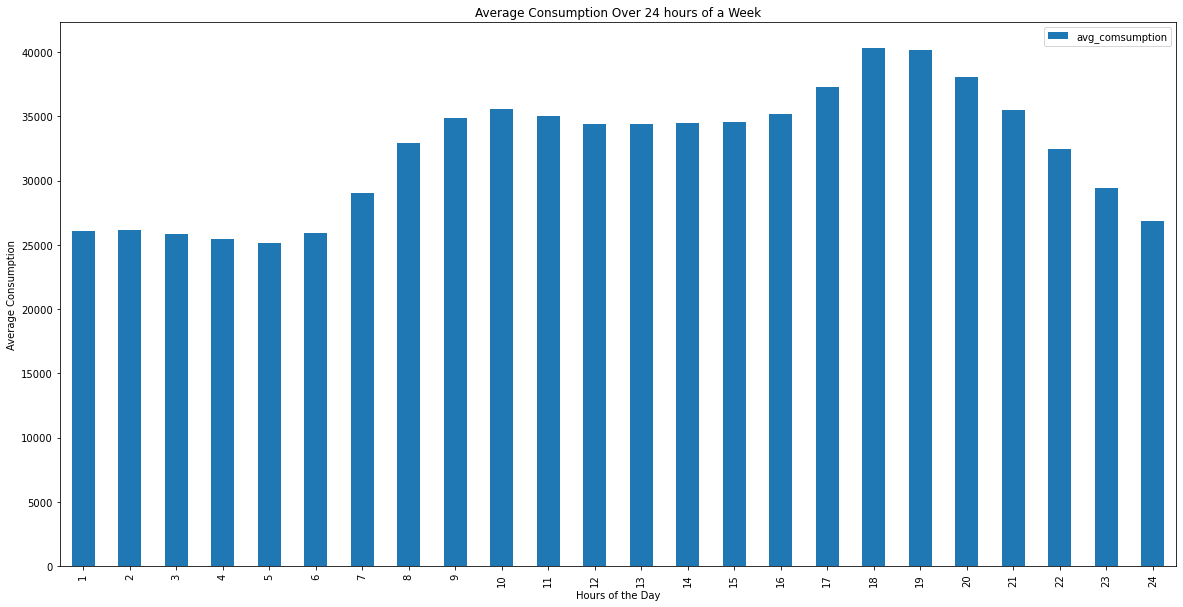

In [2]:
#One bar graph has 24 bars showing the average consumption
bmr["grp1"] = (bmr['Time'].str.split(':').str[0]).astype(int) + 1
agg_1 = bmr \
        .groupby('grp1') \
        .agg(avg_comsumption = ('Demand', 'mean'),
            hours = ('grp1','first'))
agg_1.plot.bar(x='hours', y='avg_comsumption', figsize=(20, 10), title = 'Average Consumption Over 24 hours of a Week', xlabel = 'Hours of the Day', ylabel = 'Average Consumption')

In [3]:
#Adding group number for the second aggregation
bmr.insert(loc=0, column='grp2', value=(np.arange(len(bmr))/12).astype(int)+1)

<AxesSubplot:title={'center':'Average Demand Per hour of the day over one Week'}, xlabel='Hours of the Week', ylabel='Average Demand'>

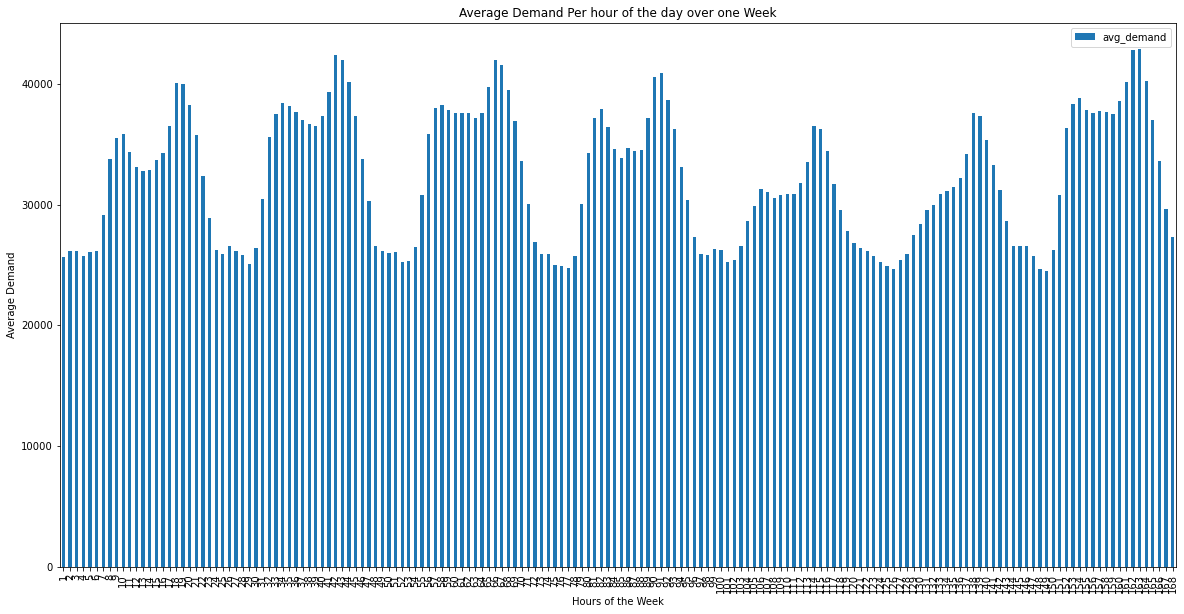

In [4]:
#One bar graph has 7x24 bars showing the average demand
agg_2 = bmr \
        .groupby('grp2') \
        .agg(avg_demand = ('Demand', 'mean'),
             groups = ('grp2', 'first'))
agg_2.plot.bar(x='groups', y='avg_demand', figsize=(20, 10), title = 'Average Demand Per hour of the day over one Week', xlabel = 'Hours of the Week', ylabel = 'Average Demand')